# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 5</span> - <span style="color:red"> Only for master students</span>


In quantum physics a **wave function**, $\Psi$, is a mathematical description of the state of a quantum system. The wave function is a complex-valued probability amplitude, and the probabilities for the possible results of measurements made on the system can be derived from it.

For now on, let's consider the simple case of a non-relativistic single particle, without spin, in three spatial dimensions. The state of such a particle is completely described by its wave function, $\Psi(\vec{r},t)$, where $\vec{r}$ is position and $t$ is time.

For one spinless particle, if the wave function is interpreted as a probability amplitude, the square modulus of the wave function, $|\Psi(\vec{r},t)|^2$, is interpreted as the probability density that the particle is at $\vec{r}$ at time $t$. Once we have a probability density, we can use Monte Carlo ...

#### Hydrogen atom
The wave functions of the eigenstates of an electron in a Hydrogen atom (this is the only atom for which the Schroedinger equation has been solved exactly) are expressed in terms of spherical harmonics and generalized Laguerre polynomials. It is convenient to use spherical coordinates, and the wave function can be separated into functions of each coordinate:

$$
\Psi_{n,l,m}(r,\theta,\phi)=
\sqrt{\left(\frac{2}{na_0}\right)^3 \frac{(n-l-1)!}{2n[(n+l)!]}}
e^{-r/na_0}\left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right)
Y_l^m(\theta,\phi)
$$

where $a_0=4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$ nm is the Bohr radius, $L_{n-l-1}^{2l+1}$ are the generalized Laguerre polynomials of degree $n-l-1$, $n=1,2,...$ is the principal quantum number, $l=0,1, ..., n-1$ the azimuthal quantum number, $m=-l, -l+1, ..., l-1, l$ the magnetic quantum number.

For example, the ground state wave function is:
$$
\Psi_{1,0,0}(r,\theta,\phi)=
\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0} 
$$
whereas one of the three $2p$ excited state is:
$$
\Psi_{2,1,0}(r,\theta,\phi)=
\frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta)
$$
<span style="color:blue">Expectation values for the radius turns out to be exactly:
$$
\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0
\quad
\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0
$$
</span>


### Exercise 05.1


Use the Metropolis algorithm to sample $|\Psi_{1,0,0}(x,y,z)|^2$ and $|\Psi_{2,1,0}(x,y,z)|^2$ **in Cartesian coordinates** using, initially, an uniform transition probability $T(\vec{x}|\vec{y})$. Use the sampled positions to estimate $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$. As usual, use data blocking and give an estimate of the statistical uncertainties.

<span style="color:red">Show a picture of your estimations of $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^6$) as a function of the number of blocks, $N$</font>.

- Use Bohr radius units, $a_0$ for distances
- Choose the step of the uniform transition probability $T(\vec{x}|\vec{y})$ in order to obtain 50% of acceptance in both cases
- Choose a reasonable starting point in the 3D space and equilibrate your sampling before to start measuring the radius. What do you observe when you start very far from the origin?
- How large should be the number of Monte Carlo Metropolis steps in each block?
- <span style="color:red">If you use a multivariate normal transition probability $T(\vec{x}|\vec{y})$, i.e. a Gaussian for each coordinate, your results for $\left\langle r \right\rangle_{\Psi_{1,0,0}}$ and $\left\langle r \right\rangle_{\Psi_{2,1,0}}$ are equivalent?</span>

You can use a Python code similar to the following one to observe how the sampled points distribute into the 3D space:

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

M=1000
X=np.random.normal(0.0,1.0,M)
Y=np.random.normal(0.0,1.0,M)
Z=np.random.normal(0.0,1.0,M)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)

plt.show()

---

### L'algoritmo di Metropolis

L'algoritmo di Metropolis è un algoritmo che permette di estrarre variabili aleatorie da una qualsivoglia distribuzione di probabilità: partendo da un punto scelto $x_0$, viene proposta una mossa secondo la distribuzione $T(y|x_0)$ che può essere accettata o rifiutata con una probabilità detta di accettazione $A(y|x_0)$. 
La successione delle mosse accettate genera una catena di Markov che porta l'insieme delle nuove posizioni a campionare la distribuzione desiderata.

In pratica il procedimento con cui vengono estratte le variabili casuali $x$ all'interno di una distribuzione di probabilità $P(x)$ è il seguente (per semplicità si sta considerando una distribuzione in $\mathbb{R}$:
1. Si considera un punto iniziale $x_0$ nel dominio della distribuzione;

2. Ci si sposta dal suddetto punto iniziale in modo casuale $x_1 = x_0+\delta$, in modo tale che $\delta\in [-\Delta, \Delta]$, e si calcola il fattore

$$\alpha = \frac{P(x_0+\delta)}{P(x_0)}\,\,;$$

3. Si estrae casualmente il fattore $q\in [0,1)$, e se $q<\alpha$ allora viene salvata la variabile $x_1$, che verrà utilizzata come punto di partenza per lo step seguente, altrimenti viene scartata, e viene salvata al suo posto la variabile $x_0$;

4. Si itera il procedimento $M$ volte così da avere $M$ variabili aleatorie $\{x_1, x_2, ..., x_M\}$ che sono estratte in modo che seguano la data ditribuzione $P(x)$.

Conoscendo quindi le funzioni d'onda $\Psi_{1,0,0}$ e $\Psi_{2,1,0}$ dell'elettrone dell'atomo di idrogeno, si possono ricavare le distribuzioni di probabilità calcolando il quadrato del modulo di tali funzioni per estrarre le posizioni dell'elettrone $\vec{r} = (x,y,z)$ da tali distribuzioni.

In questo caso per utilizzare l'algoritmo di Metropolis viene implementata una classe <font face="Courier">Metropolis</font>, per cui ad un oggetto di questa classe è specificato il passo con cui evolve l'algoritmo e la distribuzione di probabilità da cui si vogliono estrarre le variabili aleatorie. Tale classe è inoltre dotata di un metodo <font face="Courier">Run($M, r_0$)</font>, che esegue $M$ step dell'algoritmo di Metropolis a partire dal punto $r_0$.

Nell'utilizzare la classe <font face="Courier">Metropolis</font>, bisogna tenere presente che va scelto un punto iniziale $x_0$ e un passo tali per cui l'algoritmo di Metropolis possa estrarre $M$ variabili casuali che convergano alla distribuzione $P(x)$ desiderata. Per fare ciò si sceglie solitamente un punto iniziale relativamente vicino ad un picco della distribuzione, e un passo che non sia nè troppo grande, per evitare che ci siano troppi punti scartati (bassa efficienza), nè troppo piccolo, per evitare che i punti scartati siano troppo pochi (alta correlazione). Ci si aspetta dunque che una buona run sia determinata da circa il $50\%$ di punti accettati (e rifiutati). 

In seguito viene dunque stimata la distanza media dell'elettrone dal nucleo dell'atomo di idrogeno per lo stato fondamentale e per un suo stato eccitato, utilizzando l'algoritmo di Metropolis, estraendo per ognuno dei due stati $M=1000000$ variabili aleatorie, distribuite rispettivamente secondo le distribuzioni $|\Psi_{1,0,0}|^2$ e $|\Psi_{2,1,0}|^2$, ed eseguendo l'analisi mediante Data Blocking, in cui le variabili estratte verranno suddivise in $N=100$ blocchi.

---

### Stato fondamentale $(n=1, l=0, m=0)$

Prima di tutto, per determinare quali potrebbero essere un buon punto iniziale $r_0$ e un buon passo $\delta$ per inizializzare l'algoritmo di Metropolis, si può analizzare la densità di probabilità radiale

$$\rho_{nl}(r) = r^2|R_{nl}(r)|^2$$

associata allo stato dell'atomo di idrogeno.

Si sa che la funzione radiale associata allo stato fondamentale dell'idrogeno $(Z=1)$ è data da

$$R_{10}(r) = \Big(\frac{1}{a_0}\Big)^{3/2}2e^{-r/a_0}\,\,,$$

da cui la densità di probabilità radiale associata allo stato fondamentale è la seguente.

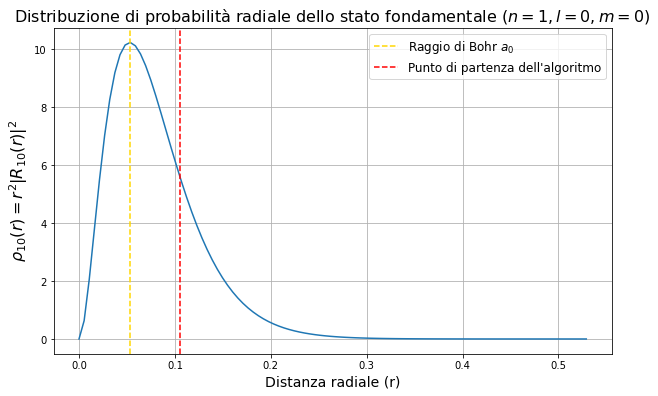

In [2]:
# Raggio di Bohr in nanometri
a0 = 0.0529

def R_10(r):
    psi = 2 * a0**(-3/2) * np.exp(-r/a0)
    return psi

r = np.linspace(0, 10*0.0529, 100) # Intervallo di distanza radiale
wavefunction = (R_10(r) * r)**2

plt.figure(figsize=(10, 6))

plt.plot(r, wavefunction)
plt.xlabel('Distanza radiale (r)', fontsize=14)
plt.ylabel('$ρ_{10}(r) = r^2|R_{10}(r)|^2$', fontsize=16)
plt.axvline(x=a0, color='gold', linestyle='--', label='Raggio di Bohr $a_0$')
plt.axvline(x=2*a0, color='red', linestyle='--', label='Punto di partenza dell\'algoritmo')
plt.title('Distribuzione di probabilità radiale dello stato fondamentale $(n=1,l=0,m=0)$', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)

plt.show()

Si osserva come il picco della distribuzione sia localizzata presso il raggio di Bohr $a_0$, per cui è lecito considerare come punto di partenza $\vec{x}_0$ dell'algoritmo di Metropolis un punto tale che $r_0 = 2a_0$, e un passo $\delta$ (per la singola coordinata) dell'ordine del raggio di Bohr. In questo caso è stato scelto $\delta \in [-1.2a_0, 1.2a_0]$.

Avendo scelto punto di partenza e passo, si può dunque implementare l'algoritmo di Metropolis in modo tale che esso estragga $M$ punti dalla distribuzione $|\Psi_{1,0,0}|^2$. Di seguito sono riportati i punti $\vec{x}=(x,y,z)$ estratti dall'algoritmo, che quindi dovrebbero raffigurare l'orbitale $1s$.

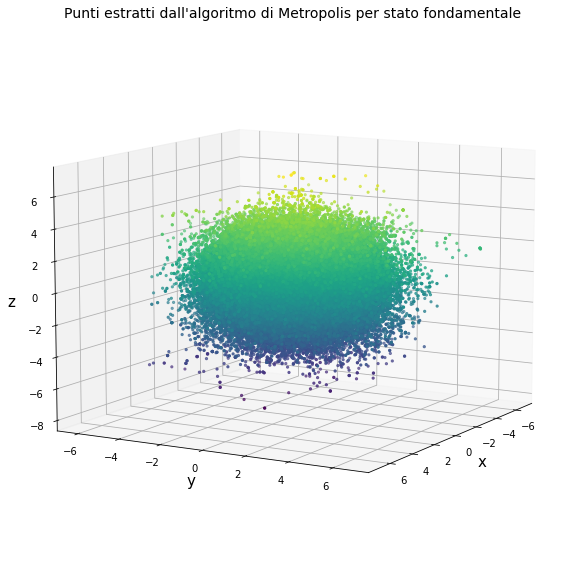

In [3]:
from mpl_toolkits.mplot3d import Axes3D

punti_gs = np.loadtxt('results_xyz_gs.dat')
x = punti_gs[:,0] / a0
y = punti_gs[:,1] / a0
z = punti_gs[:,2] / a0

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, marker='.')

ax.set_title('Punti estratti dall\'algoritmo di Metropolis per stato fondamentale' ,fontsize=14)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
ax.view_init(10, 30)

# Mostra il grafico
plt.show()

La forma dei punti estratti dall'algoritmo sembrerebbe essere compatibile con l'orbitale $1s$.

Ora, mediante il Data Blocking, si determina se la media della distanza dell'elettrone dal nucleo è compatibile con quella teorica, sia nel caso in cui lo step dell'algoritmo è determinato secondo una distribuzione $T$ uniforme in $[-1.2a_0, 1.2a_0]$, sia nel caso in cui lo step dell'algoritmo è determinato secondo una distribuzione $T$ gaussiana con $\mu=0,\,\sigma=0.76\,a_0$.

Di seguito sono rappresentati i grafici delle medie progressive con deviazioni standard progressive delle distanze dell'elettrone dal nucleo calcolate attraverso l'algoritmo di Metropolis, il cui step è determinato rispettivamente da una distribuzione uniforme e una distribuzione gaussiana.

In [4]:
# Divido i risultati per a_0 così posso valutare il risultato nelle unità del raggio di Bohr
risultati_1u = np.loadtxt('results_db_gs_u.dat')
risultati_1g = np.loadtxt('results_db_gs_g.dat')

blocchi_1 = risultati_1u[:,0]
medie_1 = risultati_1u[:,1] / 0.0529
deviazioni_1 = risultati_1u[:,2] / 0.0529

blocchi_2 = risultati_1g[:,0]
medie_2 = risultati_1g[:,1] / 0.0529
deviazioni_2 = risultati_1g[:,2] / 0.0529

In [5]:
plt.figure(figsize=(18,6))

# Grafico 1
plt.subplot(1,2,1)
plt.title("$r$ calcolata mediente distribuzione uniforme",fontsize=18,pad=20)
plt.errorbar(blocchi_1, medie_1, yerr=deviazioni_1)
plt.axhline(y=3/2, color='red', linestyle='--', label='Valore teorico di $r$ media')
plt.ylabel('Distanza dal nucleo $[a_0]$',fontsize=14)
plt.xlabel("Numero di blocchi",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Grafico 2
plt.subplot(1,2,2)
plt.title("$r$ calcolata mediente distribuzione gaussiana",fontsize=18,pad=20)
plt.errorbar(blocchi_2, medie_2, yerr=deviazioni_2)
plt.axhline(y=3/2, color='red', linestyle='--', label='Valore teorico di $r$ media')
plt.ylabel('Distanza dal nucleo $[a_0]$',fontsize=14)
plt.xlabel('Numero di blocchi',fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

plt.show()

Si osserva come entrambe le analisi della media progressiva della distanza dell'elettrone dal nucleo mostrano una compatibilità fra i avlori ottenuti dalle simulazioni e il valore teorico $\langle r\rangle_{100}=\frac{3}{2}a_0$.

---

### Stato eccitato $(n=2, l=1, m=0)$

Anche in questo caso, per determinare quali potrebbero essere un buon punto iniziale $r_0$ e un buon passo $\delta$ per inizializzare l'algoritmo di Metropolis, si analizza la densità di probabilità radiale associata allo stato dell'atomo di idrogeno.

Si sa che la funzione radiale associata allo stato eccitato con $(n=2,l=1,m=0)$ dell'idrogeno $(Z=1)$ è data da

$$R_{10}(r) = \Big(\frac{1}{2a_0}\Big)^{3/2}\frac{r}{\sqrt{3}a_0}e^{-r/2a_0}\,\,,$$

da cui la densità di probabilità radiale associata allo stato fondamentale è la seguente.

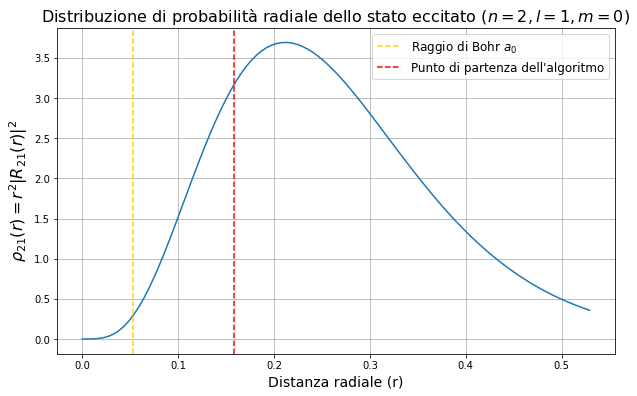

In [6]:
def R_21(r):
    psi = ((2*a0)**(-3/2)) * (r/(np.sqrt(3)*a0)) * np.exp(-r/(2*a0))
    return psi

r = np.linspace(0, 10*0.0529, 100) # Intervallo di distanza radiale
wavefunction = (R_21(r) * r)**2

plt.figure(figsize=(10, 6))

plt.plot(r, wavefunction)
plt.xlabel('Distanza radiale (r)', fontsize=14)
plt.ylabel('$ρ_{21}(r) = r^2|R_{21}(r)|^2$', fontsize=16)
plt.axvline(x=a0, color='gold', linestyle='--', label='Raggio di Bohr $a_0$')
plt.axvline(x=3*a0, color='red', linestyle='--', label='Punto di partenza dell\'algoritmo')
plt.title('Distribuzione di probabilità radiale dello stato eccitato $(n=2,l=1,m=0)$', fontsize=16)
plt.grid(True)
plt.legend(fontsize=12)

plt.show()

Si osserva come il picco della distribuzione in questo caso sia posizionato a destra rispetto il raggio di Bohr $a_0$, per cui è lecito considerare come punto di partenza $\vec{x}_0$ dell'algoritmo di Metropolis un punto tale che $r_0 = 3a_0$, in modo tale da essere relativamente vicini al picco, e anche qui un passo $\delta$ (per la singola coordinata) dell'ordine del raggio di Bohr. In questo caso è stato scelto $\delta \in [-3a_0, 3a_0]$.

Avendo scelto punto di partenza e passo, si implementa l'algoritmo di Metropolis in modo tale che esso estragga $M$ punti dalla distribuzione $|\Psi_{2,1,0}|^2$. Di seguito sono riportati i punti $\vec{x}=(x,y,z)$ estratti dall'algoritmo, che quindi dovrebbero raffigurare l'orbitale $2p$.

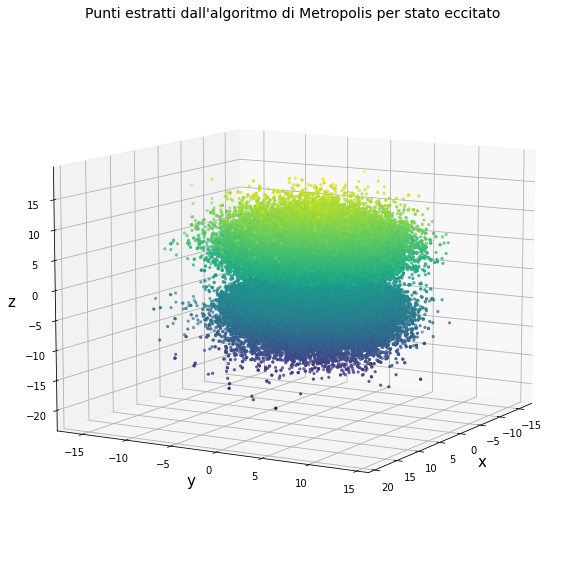

In [7]:
punti_es = np.loadtxt('results_xyz_es.dat')
x = punti_es[:,0] / a0
y = punti_es[:,1] / a0
z = punti_es[:,2] / a0

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=z, marker='.')

ax.set_title('Punti estratti dall\'algoritmo di Metropolis per stato eccitato', fontsize=14)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
ax.view_init(10, 30)

plt.show()

La forma dei punti estratti dall'algoritmo sembrerebbe essere compatibile con l'orbitale $2p$.

Ora, mediante il Data Blocking, si determina di nuovo se la media della distanza dell'elettrone dal nucleo nel caso dell stato eccitato è compatibile con quella teorica, sia nel caso in cui lo step dell'algoritmo è determinato secondo una distribuzione $T$ uniforme $\mathcal{U}$ in $[-3a_0, 3a_0]$, sia nel caso in cui lo step dell'algoritmo è determinato secondo una distribuzione $T$ gaussiana $\mathcal{G}$ con $\mu=0,\,\sigma=1.9\,a_0$ (per ogni coordinata).

Di seguito sono rappresentati i grafici delle medie progressive con deviazioni standard progressive delle distanze dell'elettrone dal nucleo calcolate attraverso l'algoritmo di Metropolis, il cui step è determinato rispettivamente da una distribuzione uniforme e una distribuzione gaussiana.

In [8]:
# Divido i risultati per a_0 così posso valutare il risultato nelle unità del raggio di Bohr
risultati_2u = np.loadtxt('results_db_es_u.dat')
risultati_2g = np.loadtxt('results_db_es_g.dat')

blocchi_1 = risultati_2u[:,0]
medie_1 = risultati_2u[:,1] / 0.0529
deviazioni_1 = risultati_2u[:,2] / 0.0529

blocchi_2 = risultati_2g[:,0]
medie_2 = risultati_2g[:,1] / 0.0529
deviazioni_2 = risultati_2g[:,2] / 0.0529

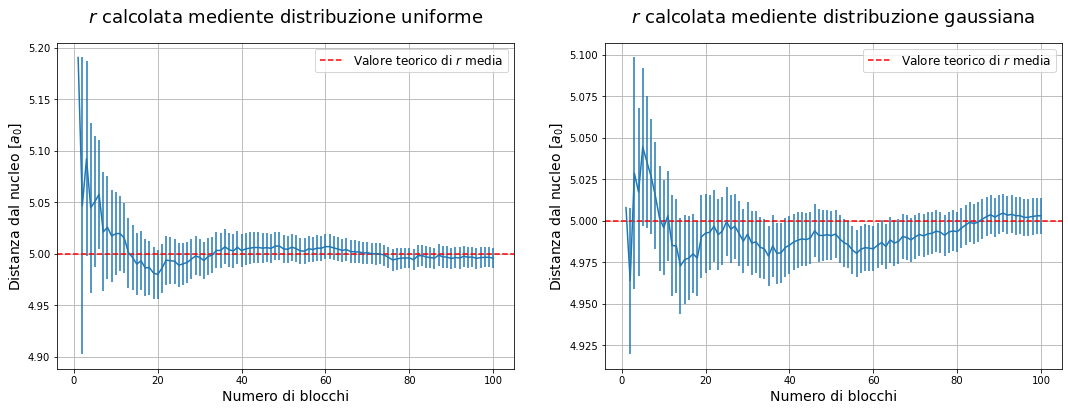

In [9]:
plt.figure(figsize=(18,6))

# Grafico 1
plt.subplot(1,2,1)
plt.title("$r$ calcolata mediente distribuzione uniforme",fontsize=18,pad=20)
plt.errorbar(blocchi_1, medie_1, yerr=deviazioni_1)
plt.axhline(y=5, color='red', linestyle='--', label='Valore teorico di $r$ media')
plt.ylabel('Distanza dal nucleo $[a_0]$',fontsize=14)
plt.xlabel("Numero di blocchi",fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Grafico 2
plt.subplot(1,2,2)
plt.title("$r$ calcolata mediente distribuzione gaussiana",fontsize=18,pad=20)
plt.errorbar(blocchi_2, medie_2, yerr=deviazioni_2)
plt.axhline(y=5, color='red', linestyle='--', label='Valore teorico di $r$ media')
plt.ylabel('Distanza dal nucleo $[a_0]$',fontsize=14)
plt.xlabel('Numero di blocchi',fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Visualizza i grafici
plt.show()

Si osserva di nuovo come entrambe le analisi della media progressiva della distanza dell'elettrone dal nucleo mostrano una compatibilità fra i vlori ottenuti dalle simulazioni e il valore teorico $\langle r\rangle_{210}=5a_0$.